In [1]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo')
from analytic import singlePop_2tp, singlePop_2tp_given_vecNe 

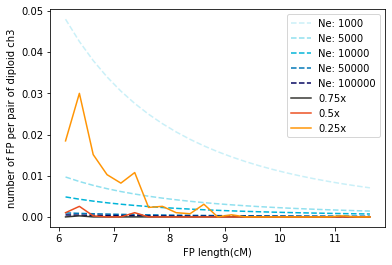

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

nsamples = [13, 13, 13]
covs = ['cov3over4', 'cov1over2', 'cov1over4']
cov2str = {'cov3over4':'0.75x', 'cov1over2':'0.5x', 'cov1over4':'0.25x'}
bins = np.arange(6,12,0.25)
binmidpoint = (bins[1:]+bins[:-1])/2

colors = ['#CAF0F8', '#90E0EF', '#00B4D8', '#0077B6', '#03045E']
Nes = [1000, 5000, 10000, 50000, 100000]
for Ne, color in zip(Nes, colors):
    lambdas = singlePop_2tp(2.232573, binmidpoint/100, 0, Ne)
    lambdas = 4*lambdas*(binmidpoint[1]-binmidpoint[0])/100
    plt.plot(binmidpoint, lambdas, linestyle='--', label=f'Ne: {Ne}', color=color)

colors = ['#353531', '#EC4E20', '#FF9505']
for cov, nsample, color in zip(covs, nsamples, colors):
    dfs = []
    for b in np.arange(1,51):
        if os.path.exists(f'./{cov}/batch{b}/ch3.tsv'):
            df = pd.read_csv(f'./{cov}/batch{b}/ch3.tsv', sep='\t')
            dfs.append(df)
    df = pd.concat(dfs)
    FPs = np.array(100*df['lengthM'])
    x, _ = np.histogram(FPs, bins=bins)

    plt.plot(binmidpoint, x/(len(dfs)*(nsample*(nsample-1)/2)), color=color, label=f'{cov2str[cov]}')

plt.ylabel('number of FP per pair of diploid ch3')
plt.xlabel('FP length(cM)')
plt.legend(loc='upper right')
plt.savefig('FP.png', dpi=300)